<a href="https://colab.research.google.com/github/LuqmanFiqri/5300_final/blob/main/PHYSICS_5300_Final_Problem_Double_Pendulum_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Double Pendulum

This section solves the double pendulum problem using Euler-Lagrange's Equations.

The generalized coordinates for this problem is $\phi_1$ and $\phi_2$.


## Euler-Lagrange's Equations

The Lagrangian correspond to the system:

\\
$\begin{align}
  \mathcal{L} = T - U
\end{align}$

\\
$\begin{align}
  T = \frac{1}{2}(m_1 + m_2) L^2_1 \dot\phi_1^2 + m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2) + \frac{1}{2}m_2 L^2_2\dot\phi_2^2
\end{align}$

\\
$\begin{align}
  U = (m_1 + m_2) g L_1 (1-\cos\phi_1) + m_2 g L_2 (1-\cos\phi_2)
\end{align}$

\\
$\begin{align}
  \mathcal{L} = \frac{1}{2}(m_1 + m_2) L^2_1 \dot\phi_1^2 + m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2) + \frac{1}{2}m_2 L^2_2 \dot\phi_2^2 - (m_1 + m_2) g L_1 (1-\cos\phi_1) - m_2 g L_2 (1-\cos\phi_2)
      \;.
\end{align}$

The Euler-Lagrange Equations:

\\
$\begin{align}
   \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} =\frac{\partial\mathcal L}{\partial\phi_1}
   \quad\Longrightarrow\quad (m_1+m_2)L_1^2\ddot\phi_1+m_2L_1L_2\ddot\phi_2\cos(\phi_1-\phi_2) + m_2L_1L_2\dot\phi_2^2\sin(\phi_1-\phi_2) = -(m_1+m_2)gL_1\sin\phi_1
\end{align}$

\\
$\begin{align}
   \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} =\frac{\partial\mathcal L}{\partial\phi_2}
   \quad\Longrightarrow\quad m_2L_1L_2\ddot\phi_1\cos(\phi_1-\phi_2) - m_2L_1L_2\dot\phi_1^2\sin(\phi_1-\phi_2) + m_2L_2^2\ddot\phi_2 = -m_2gL_2\sin\phi_2
\end{align}$


Invert the equations to get $\ddot\phi_1$ and $\ddot\phi_2$:

$\begin{align}
  \ddot\phi_1 = \frac{DE - BF}{AD-BC}
\end{align}$

$\begin{align}
  \ddot\phi_2 = \frac{AF - CE}{AD-BC}
\end{align}$

where 

\\
$\begin{align}
  A = (m_1 + m_2)L_1
\end{align}$

$\begin{align}
  B = m_2L_2\cos(\phi_1 - \phi_2)
\end{align}$

$\begin{align}
  C = m_2L_1\cos(\phi_1 - \phi_2)
\end{align}$ 

$\begin{align}
  D = m_2L_2
\end{align}$

$\begin{align}
  E = -(m_1+m_2)g\sin(\phi_1) - m_2L_2\dot\phi_2^2\sin(\phi_1 - \phi_2)
\end{align}$ 

$\begin{align}
  F = -m_2g\sin(\phi_2) + m_2L_1\dot\phi_1^2\sin(\phi_1 - \phi_2)
\end{align}$   

Then, make a vector to create the code such that:

$\begin{align}
 \mathbf{Y}(t) = \left(\begin{array}{c}
                         \phi_1(t) \\
                         \dot\phi_1(t) \\
                         \phi_2(t) \\
                         \dot\phi_2(t)
                        \end{array}
                  \right)
  \quad\Longrightarrow\quad
\mathbf{\dot Y}(t) = \left(\begin{array}{c}
                         \dot\phi_1(t) \\
                         \ddot\phi_1(t) \\           
                         \dot\phi_2(t) \\
                         \ddot\phi_2(t)
                        \end{array}
                  \right)  
\end{align}$

## Code

This section consists of all the code used for the problem



### Libraries, Class and Functions

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [51]:
class doublePendulum():
    """
    doublePendulum class implements the parameters and differential equation for 
     a double pendulum using the notation from Taylor.
     
    Parameters
    ----------
    m1 : float
        first mass of pendulum 
    m2 : float
        second mass of pendulum 
    L1 : float
        Length of first pendulum 
    L2 : float
        Length of second pendulum
    g : float
        Gravitational Acceleration  


    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    solve_ode
        Returns the solution for the differential equations
    """

    def __init__(self, m1=1., m2=1., L1=1, L2=1., g=1):
        
        self.m1 = m1
        self.m2 = m2
        self.L1 = L1
        self.L2 = L2
        self.g = g


    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [phi_1_dot phi_1_ddot phi_2_dot phi_2_ddot]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi_1, y[1] = phi_1_dot, 
            y[2] = phi_2 and y[3] = phi_2_dot
            
        Returns
        -------
        [phi_1_dot phi_2_dot phi_1_ddot phi_2_ddot]
        """
        A = (self.m1 + self.m2) * self.L1
        B = self.m2 * self.L2 * np.cos(y[0] - y[2])  
        C = self.m2 * self.L1 * np.cos(y[0] - y[2])  
        D = self.m2 * self.L2
        E = -(self.m1 + self.m2) * self.g * np.sin(y[0]) \
            - self.m2 * self.L2 * y[3]**2 * np.sin(y[0] - y[2])
        F = -self.m2 * self.g * np.sin(y[2]) \
            + self.m2 * self.L1 * y[1]**2 * np.sin(y[0] - y[2])

        phi_1_ddot = (D * E - B * F) / (A * D - B * C)
        phi_2_ddot = (A * F - C * E) / (A * D - B * C)

        return [y[1], phi_1_ddot, y[3],  phi_2_ddot]

    
    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0,
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y

        return phi_1, phi_1_dot, phi_2, phi_2_dot

    def calc_E(self,y):

        """
        Return the total energy of the system

        """
        phi_1, phi_1_dot, phi_2, phi_2_dot = y.T
        
        V =  (self.m1 + self.m2) * self.g * self.L1 * np.cos(1 - phi_1) \
            + self.m2 * self.g * self.L2 * np.cos(1 - phi_2)
        T = 0.5 * (self.m1 + self.m2) * self.L1**2 * phi_1_dot**2 \
            + self.m2 * self.L1 * self.L2 * phi_1_dot * phi_2_dot * np.cos(phi_1 - phi_2) \
            + 0.5 * self.m2 * self.L2**2 * phi_2_dot**2
        
        return T + V



In [65]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [48]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index


### Main Code Execution for Double Pendulum
This section consists of the main code for the plots and animation for the double pendulum

#### Plot Generation

This code generates the plot for $\phi_1$ and $\phi_2$ as a function of time

In [52]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')



# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Set the parameters
L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.


# Instantiate the double pendulum 
p1 = doublePendulum(m1=m1, m2=m2, L1=L1, L2=L2, g=g)

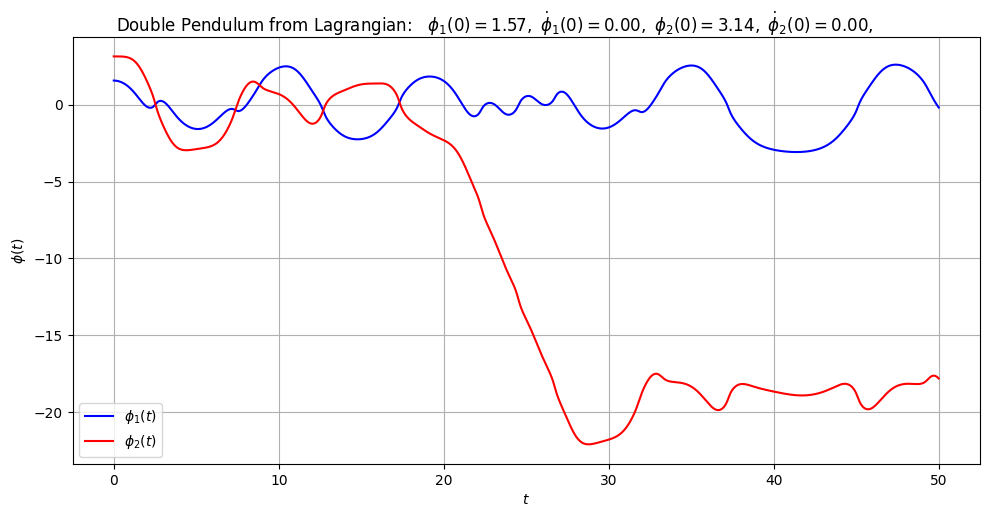

In [60]:
# Set Initial Conditions
phi_1_0 = np.pi/2
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.

# Solve for phi_1 and phi_2
phi_1, phi_1_dot, phi_2, phi_2_dot = \
      p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0)

# Create a plot
fig1 = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi_1_0:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi_1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi_2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi_2_dot_0:.2f},$' 
                # '\n'     # \n means a new line (adds some space here)
fig1.suptitle(overall_title, va='baseline')

ax_a = fig1.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels,
            color='blue',
            label=rf'$\phi_1(t)$', 
            title=None,
            ax=ax_a)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            color='red',
            label=rf'$\phi_2(t)$', 
            title=None,
            ax=ax_a)      

ax_a.grid()
fig1.tight_layout()
# fig1.savefig('double_pendulum_Lagrange_1.png', bbox_inches='tight')

#### Prove of Chaotic Motion for Double Pendulum

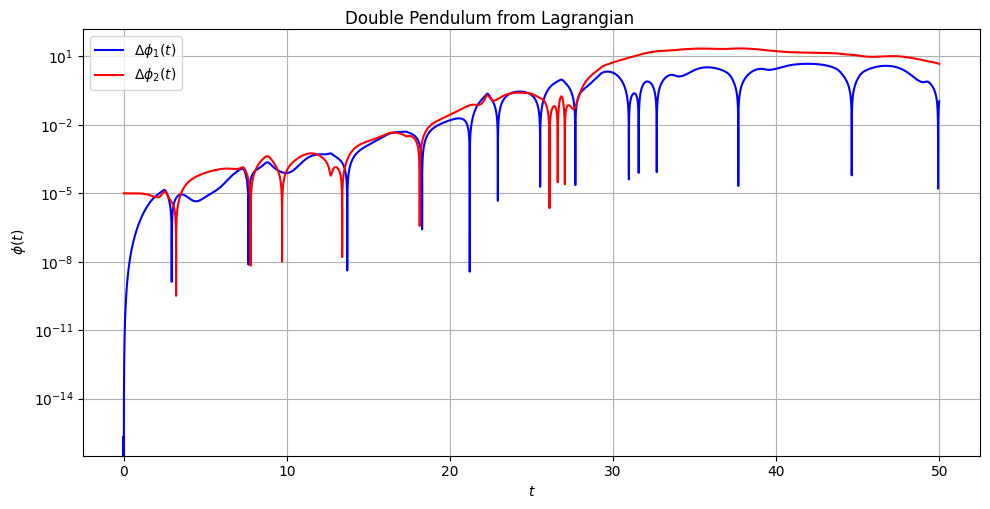

In [70]:
# Set Initial Conditions
phi_1_0 = np.pi/2
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.

# Solve for phi_1 and phi_2 with different initial condition
phi_1a, phi_1a_dot, phi_2a, phi_2a_dot = \
      p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0)
phi_1b, phi_1b_dot, phi_2b, phi_2b_dot = \
      p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0-0.00001, phi_2_dot_0)

# Take the difference
diff_phi_1 = np.abs(phi_1a - phi_1b)
diff_phi_2 = np.abs(phi_2a - phi_2b)

# Create a plot
fig2 = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian  ' 
                # rf' $\phi_1(0) = {phi_1_0:.2f},$' + \
                # rf' $\dot\phi_1(0) = {phi_1_dot_0:.2f},$' + \
                # rf' $\phi_2(0) = {phi_2_0:.2f},$' + \
                # rf' $\dot\phi_2(0) = {phi_2_dot_0:.2f},$' 
                # '\n'     # \n means a new line (adds some space here)
fig2.suptitle(overall_title, va='baseline')

ax_b = fig2.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)

# Take the difference
diff_phi_1 = np.abs(phi_1a[start : stop] - phi_1b[start : stop])
diff_phi_2 = np.abs(phi_2a[start : stop] - phi_2b[start : stop])

plot_y_vs_x(t_pts[start : stop], diff_phi_1, 
            axis_labels=phi_vs_time_labels,
            color='blue',
            semilogy=True,
            label=rf'$\Delta\phi_1(t)$', 
            title=None,
            ax=ax_b)

   
plot_y_vs_x(t_pts[start : stop], diff_phi_2, 
            color='red',
            semilogy=True,
            label=rf'$\Delta\phi_2(t)$', 
            title=None,
            ax=ax_b)      

ax_b.grid()
fig2.tight_layout()

To check whether the system is chaotic, we calculate the Liapunov Exponent:

$\begin{align}
  \Delta\phi = Ke^{\lambda t}
\end{align}$

\\
For $\phi_1$, we get the $\lambda$ value is around 1.04, which is a positive number, so the motion is chaotic.

For $\phi_1$, we get the $\lambda$ value is around 0.34, which is a positive number, so the motion is chaotic.

Therefore, the motion of the system is chaotic.


# Triple Pendulum
This section consists of the main code for the plots for the triple pendulum using Euler-Lagrange's Equations.

The generalized coordinates for this problem is $\phi_1$, $\phi_2$ and $\phi_3$.

### Euler-Lagrange Equations



The Lagrangian for the systems:

$\begin{align}
  \mathcal{L} = T - U
\end{align}$

\\
$\begin{align}
  T = \frac{1}{2}\left(m_1+m_2+m_3\right)L_1^2\dot\phi_1^2 + 
  \frac{1}{2}\left(m_2+m_3\right)L_2^2\dot\phi_2^2 + \frac{1}{2}m_3L_3^2\dot\phi_3^2 +\left(m_2+m_3\right)L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2) + &\ m_3L_2L_3\dot\phi_2\dot\phi_3\cos(\phi_2-\phi_3) + m_3L_1L_3\dot\phi_1\dot\phi_3\cos(\phi_1-\phi_3)
\end{align}$

\\
$\begin{align}
  U = (m_1 + m_2 + m_3)gL_1(1-\cos\phi_1) + (m_2 + m_3)gL_2(1-\cos\phi_2) + m_3gL_3(1-\cos\phi_3)
\end{align}$

The Euler-Lagrange Equations:

\\
$\begin{align}
   \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} =\frac{\partial\mathcal L}{\partial\phi_1}
   \quad\Longrightarrow\quad (m_1+m_2+m_3)L_1\ddot\phi_1+(m_2+m_3)L_2\ddot\phi_2\cos(\phi_1-\phi_2) + m_3L_3\ddot\phi_3\cos(\phi_1-\phi_3) + (m_2+m_3)L_2\dot\phi_2^2\sin(\phi_1-\phi_2)+m_3L_3\dot\phi_3^2\sin(\phi_1-\phi_3)  = -(m_1+m_2+m_3)g\sin\phi_1 
\end{align}$

\\
$\begin{align}
   \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} =\frac{\partial\mathcal L}{\partial\phi_2}
   \quad\Longrightarrow\quad (m_2+m_3)L_1\ddot\phi_1\cos(\phi_1-\phi_3) + m_2L_2\ddot\phi_2+(m_2+m_3)L_3\ddot\phi_3\cos(\phi_2-\phi_3) - (m_2+m_3)L_1\dot\phi_1^2\sin(\phi_1-\phi_2)+m_3L_3\dot\phi_3^2\sin(\phi_2-\phi_3) = -(m_2+m_3)g\sin\phi_2 
\end{align}$

\\
$\begin{align}
   \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_3} =\frac{\partial\mathcal L}{\partial\phi_2}
   \quad\Longrightarrow\quad m_3L_1\ddot\phi_1\cos(\phi_1-\phi_3) + m_3L_2\ddot\phi_2\cos(\phi_2-\phi_3) + m_3L_3\ddot\phi_3 - m_3L_1\dot\phi_1^2\sin(\phi_1-\phi_3) - m_3L_2\dot\phi_2^2\sin(\phi_2-\phi_3)= -m_3g\sin\phi_3 
\end{align}$



Rearrange the equations and solve for $\ddot\phi_1$, $\ddot\phi_2$ and $\ddot\phi_3$ :



Then, make a vector to create the code such that:

$\begin{align}
 \mathbf{Y}(t) = \left(\begin{array}{c}
                         \phi_1(t) \\
                         \dot\phi_1(t) \\
                         \phi_2(t) \\
                         \dot\phi_2(t) \\
                          \phi_3(t) \\
                         \dot\phi_3(t) \\
                        \end{array}
                  \right)
  \quad\Longrightarrow\quad
\mathbf{\dot Y}(t) = \left(\begin{array}{c}
                         \dot\phi_1(t) \\
                         \ddot\phi_1(t) \\
                         \dot\phi_2(t) \\
                         \ddot\phi_2(t) \\           
                         \dot\phi_3(t) \\
                         \ddot\phi_3(t)
                        \end{array}
                  \right)  
\end{align}$